# 协同过滤
协同过滤应该是业界影响力最大，应用最广泛的模型了！
扩充解释就是协同大家的反馈、评价和意见来一起对海量的信息进行过滤

具体一些的例子可以看书本上所居电视机是否推荐的例子

中间有一些概念：共现矩阵、用户相似度的计算、最终结果的排序……
> 共现矩阵：简单来说，$X_{ij}$ 代表第i个用户与第j个物品的交互情况。

## 用户相似度的计算
用户$i$、$j$用共现矩阵中的第i行和第j行表示，也就是两个向量
### 余弦相似度
Cosine Simliarity  计算公式：

$\sin(i,j)=\cos(i,j)=\frac{i\cdot j}{\|i\|\cdot\|j\|}$

分母上是两个向量的二范数相乘

In [1]:
# 余弦相似度
import numpy as np 
i = np.random.rand(10)
j = np.random.rand(10)
print(i)
print(j)

def Coine_Similarity(vector_i,vector_j):
    """
    计算两个向量的余弦相似度
    :param vector_i: 向量 A
    :param vector_j: 向量 B
    :return: 余弦相似度
    """
    dot_product = np.dot(vector_i,vector_j)
    # 二范数
    norm_i = np.linalg.norm(vector_i)
    norm_j = np.linalg.norm(vector_j)
    similarity = dot_product/(norm_i*norm_j)

    return similarity

print(Coine_Similarity(i,j))

[0.34715252 0.4934263  0.33578924 0.06533459 0.29291341 0.76055081
 0.60658803 0.36074456 0.47892209 0.81915354]
[0.29421122 0.64966232 0.74751581 0.43198141 0.44588605 0.09274979
 0.8327825  0.94082534 0.05459166 0.22562312]
0.6981538325622563


### 皮尔逊相关系数
相比余弦相似度，皮尔逊相关系数通过使用用户平均分对各独立评分进行修正，减小了用户评分偏置的影响。
$$\mathrm{sim}(i,j)=\frac{\sum_{\mathrm{p\epsilon P}}(R_{\mathrm{i,p}}-\bar{R}_{\mathrm{i}})(R_{\mathrm{j,p}}-\bar{R}_{\mathrm{j}})}{\sqrt{\sum_{\mathrm{p\epsilon P}}(R_{\mathrm{i,p}}-\bar{R}_{\mathrm{i}})^{2}}\:\sqrt{\sum_{\mathrm{p\epsilon P}}(R_{\mathrm{j,p}}-\bar{R}_{\mathrm{j}})^{2}}}$$


其中，$R_{\mathrm{i,p}}$代表用户 i 对物品 p 的评分。$\bar{R}_{\mathrm{i}}$代表用户 i 对所有物品的平均评分，
$P$代表所有物品的集合。

### 皮尔逊相关系数的变式
基于皮尔逊系数的思路，还可以通过引入物品平均分的方式，减少物品
评分偏置对结果的影响，如所示。
$$\sin(i,j)=\frac{\sum_{\mathrm{p\epsilon P}}(R_{\mathrm{i,p}}-\overline{R_{p}})(R_{\mathrm{j,p}}-\overline{R_{p}})}{\sqrt{\sum_{\mathrm{p\epsilon P}}(R_{\mathrm{i,p}}-\overline{R_{p}})^{2}}\:\sqrt{\sum_{\mathrm{p\epsilon P}}(R_{\mathrm{j,p}}-\overline{R_{p}})^{2}}}$$

其中，$\overline{R}_{\mathrm{p}}$代表物品 p得到所有评分的平均分。
在相似用户的计算过程中，理论上，任何合理的“向量相似度定义方式”都可以作为相似用户计算的标准。在对传统协同过滤改进的工作中，研究人员也是通过对相似度定义的改进来解决传统的协同过滤算法存在的一些缺陷的。

> 这两个就暂时先不实现代码了，以后有机会再补充！

# ItemCF
基于物品的协同过滤。
思想：找到与用户以前感兴趣的物品来进行推荐！
+ 通过计算物品之间的相似度，得到物品相似度矩阵
+ 通多用户历史上正反馈的物品找出相似物品来进一步排序和推荐

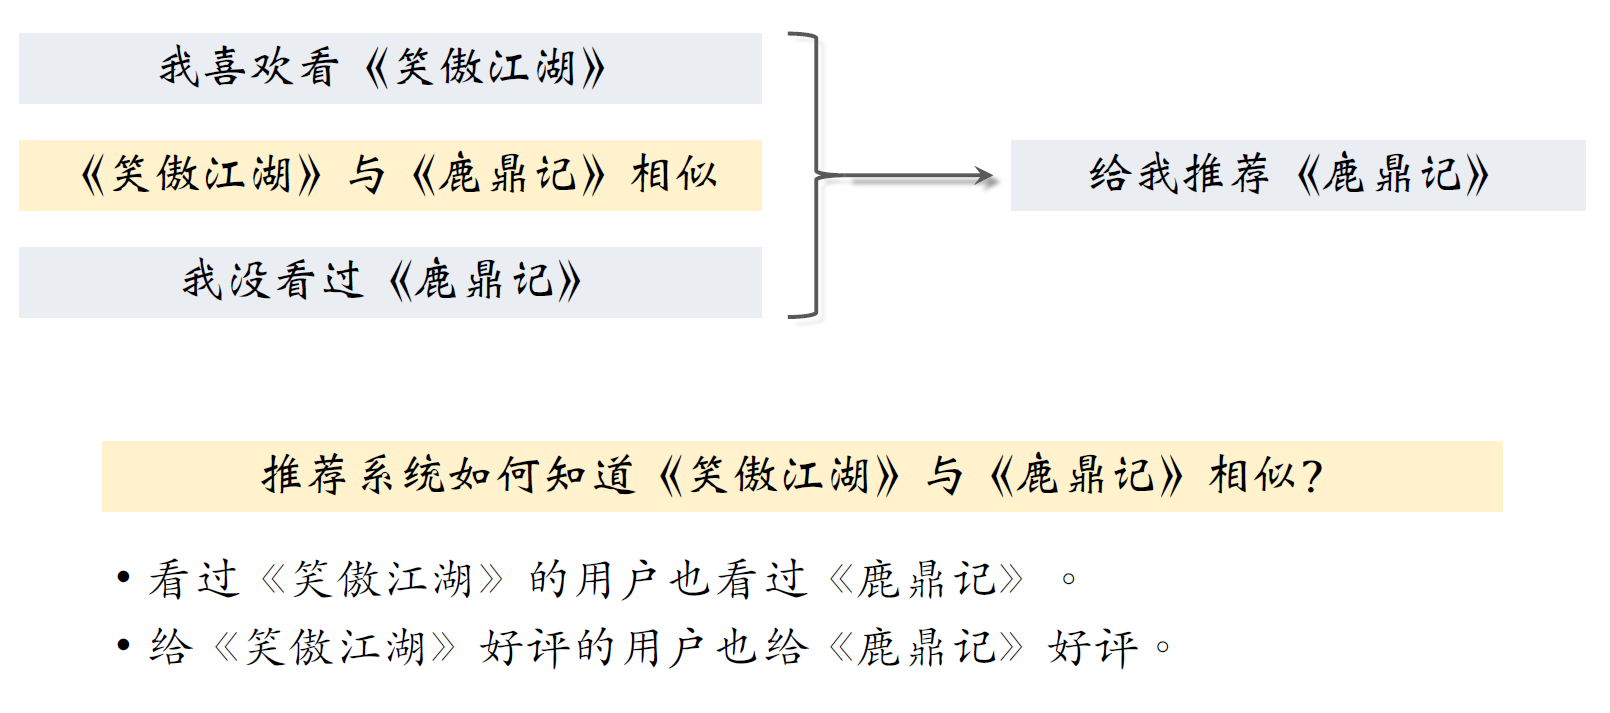
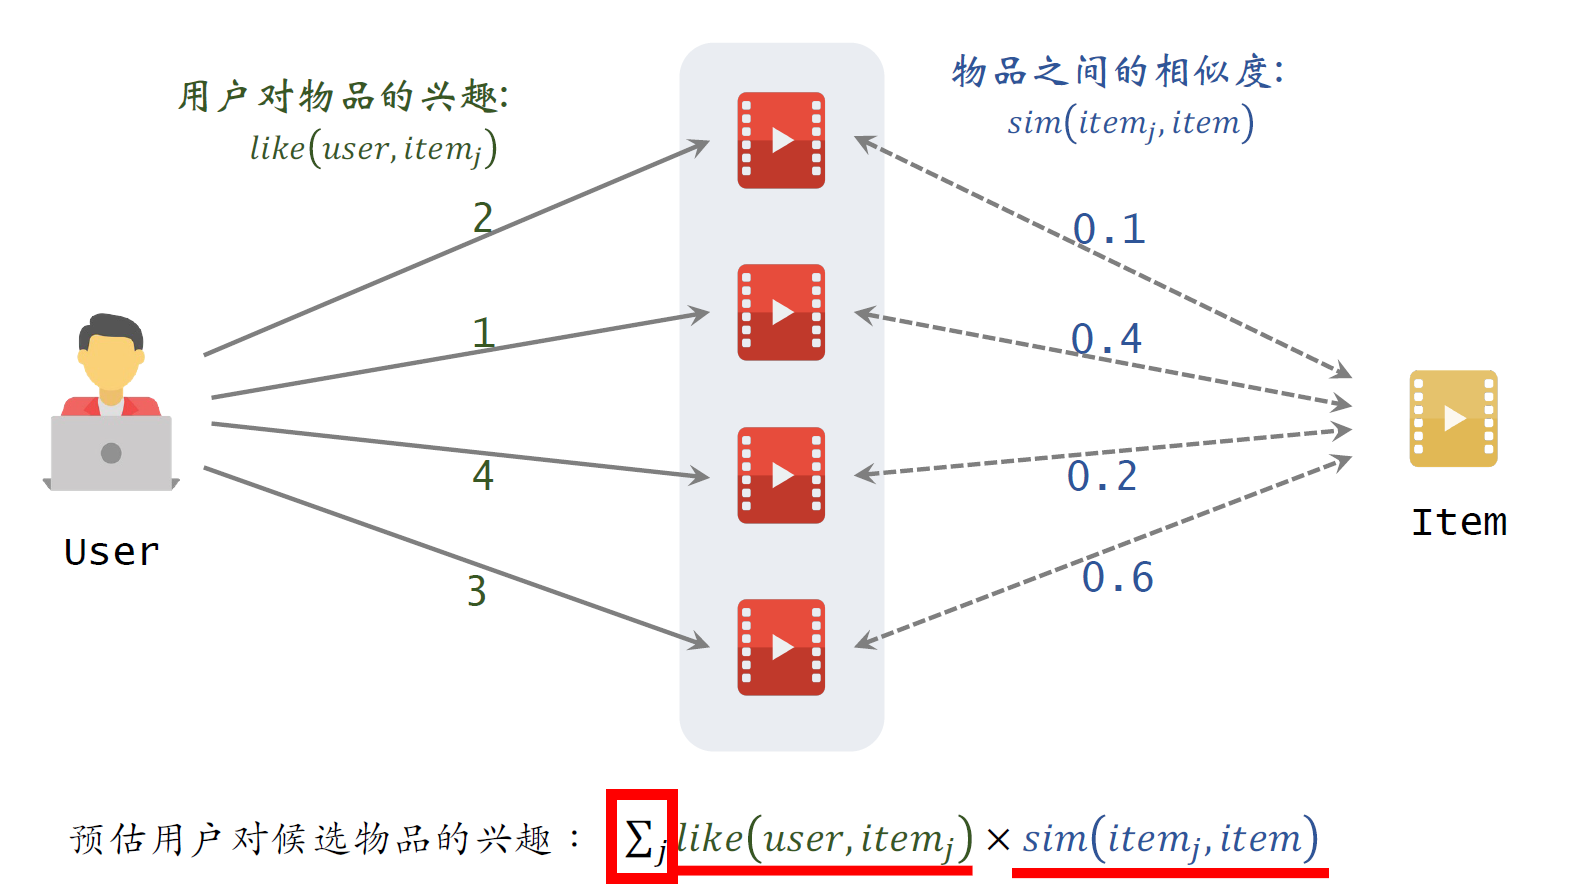

所以需要计算物品之间的相似度以及用户对物品的感兴趣程度！
### 物品相似度
在不考虑用户对物品的喜欢程度时（也就是说只有喜欢和不喜欢），公式如下：
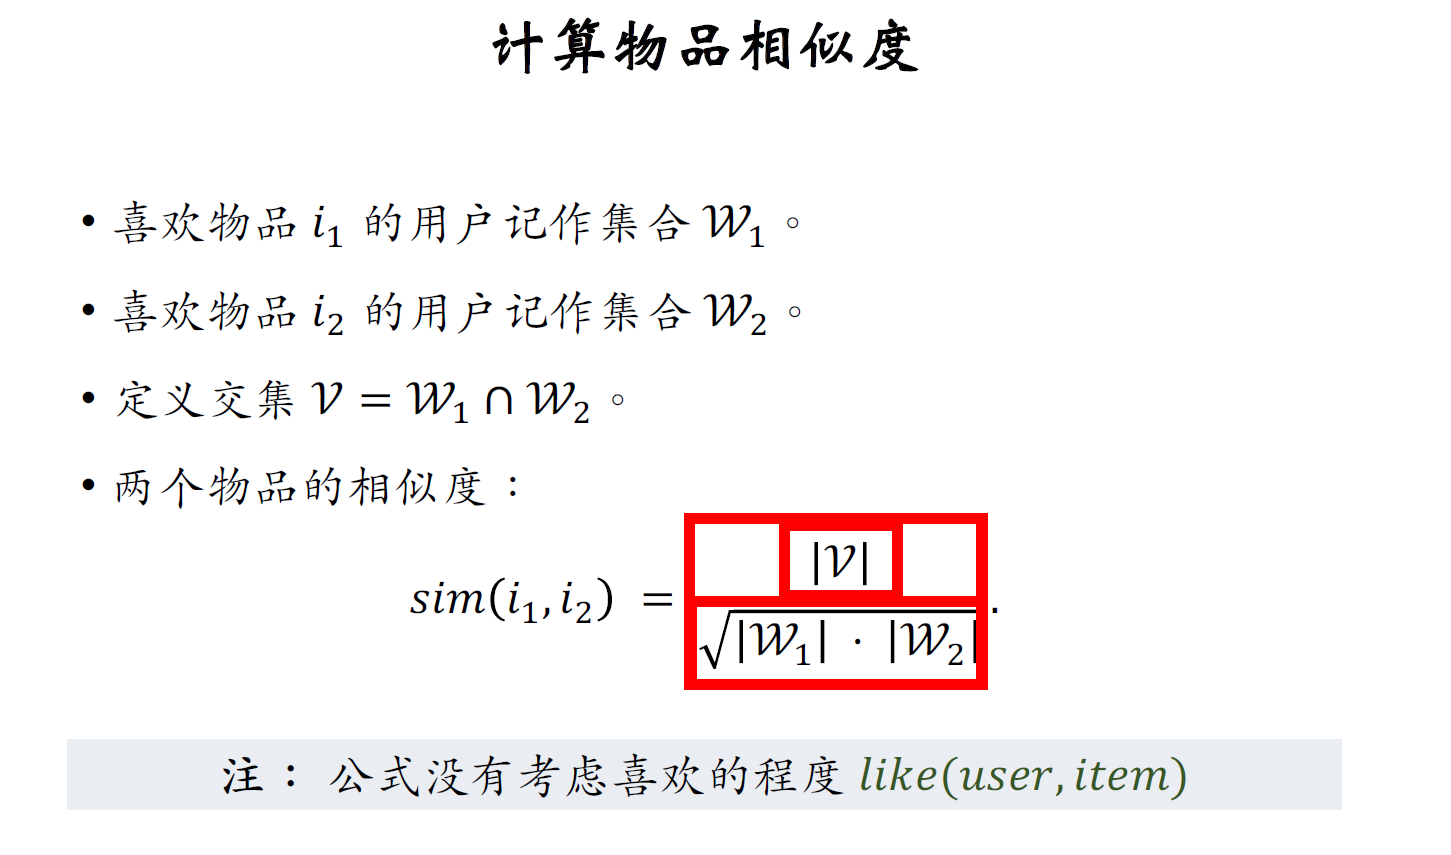



考虑喜欢程度的计算公式
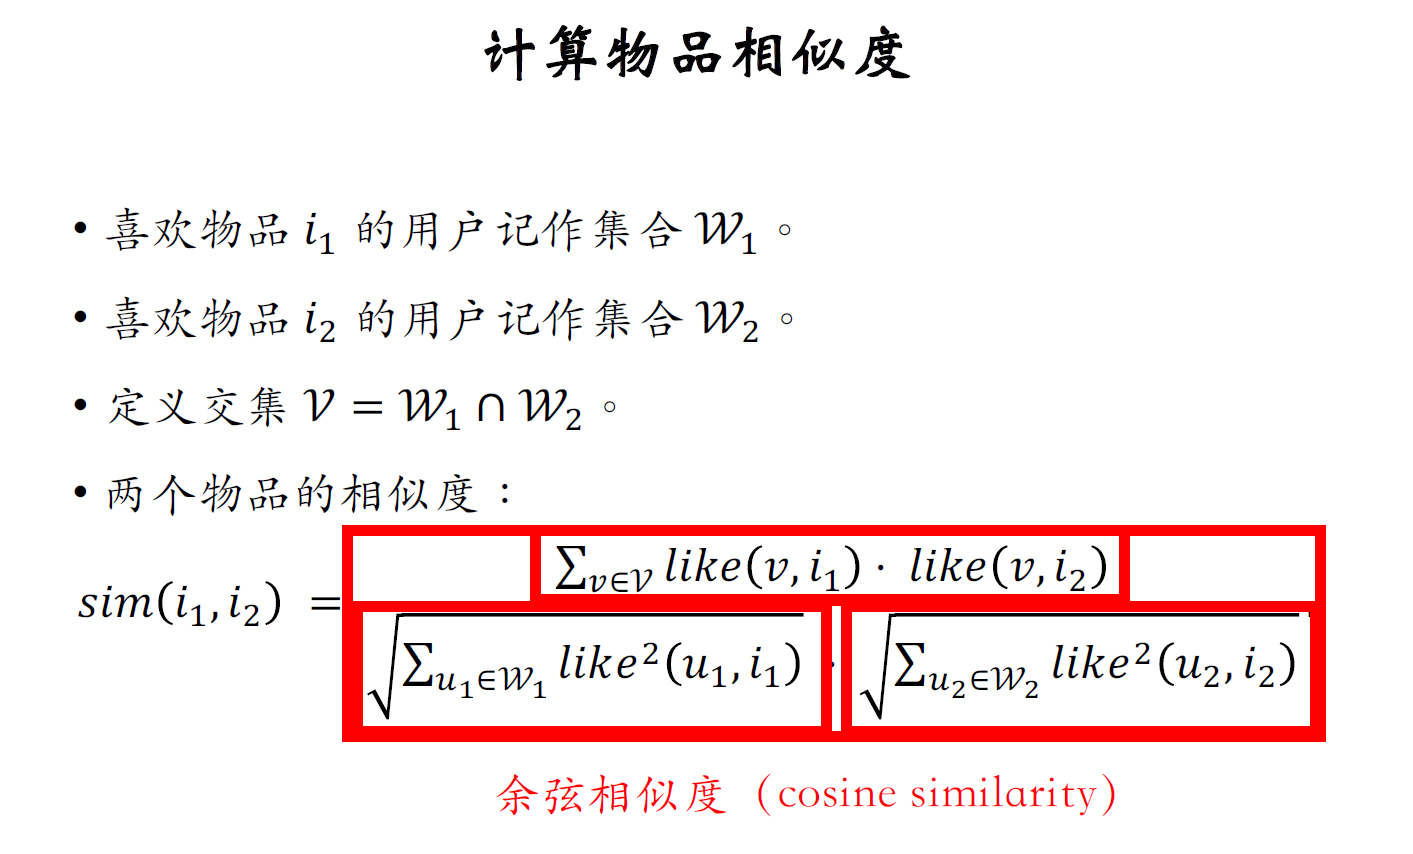

实际上就是共现矩阵中两个行向量之间的余弦相似度！

### ItemCF的完整召回流程
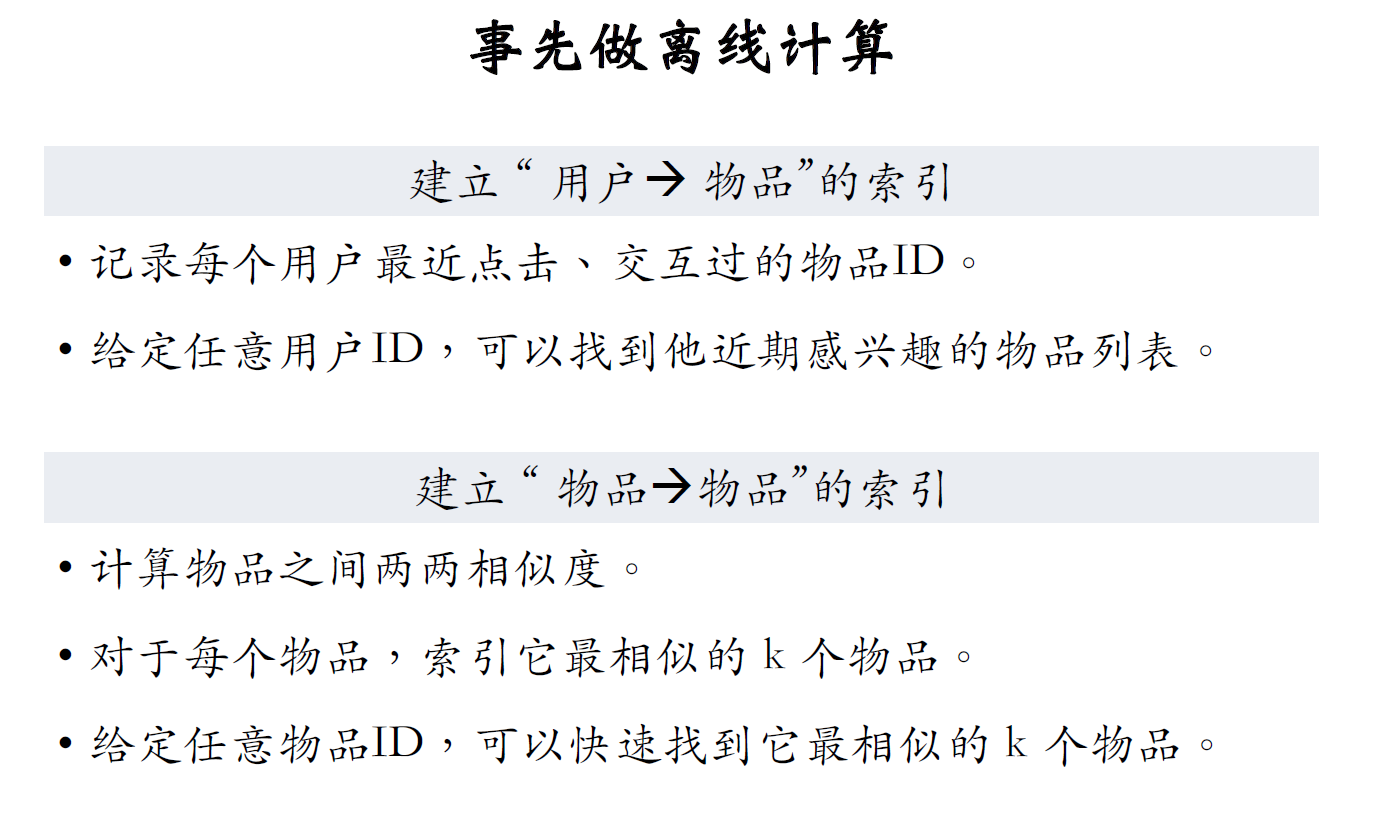

> 这里还能看到top-k的算法实际应用，哈哈哈

**索引的意义在于避免枚举所有的物品。**

**⽤索引，离线计算量⼤，线上计算量⼩。**

### 代码实现
~~使用的数据是明尼苏达大学的ml-25m。~~
太大了，换成ml-1m了。

> 在此立下flag，以后一定要把这个25m的给实现一下，因为面向真实世界的肯定会更大，也一定是优秀的工程师需要想办法克服的！

公开数据集，仅供练手使用！

In [2]:
import pandas as pd 
import tqdm
from tqdm import tqdm

# 加载ratings.dat文件
ratings = pd.read_csv('../datasets-ml-1m/ratings.dat', sep='::', header=None, engine='python', names=['UserID', 'MovieID', 'Rating', 'Timestamp'],encoding='ISO-8859-1')

# 加载movies.dat文件
movies = pd.read_csv('../datasets-ml-1m/movies.dat', sep='::', header=None, engine='python', names=['MovieID', 'Title', 'Genres'], encoding='ISO-8859-1')

# 加载users.dat文件
users = pd.read_csv('../datasets-ml-1m/users.dat', sep='::', header=None, engine='python', names=['UserID', 'Gender', 'Age', 'Occupation', 'Zip-code'], encoding='ISO-8859-1')

In [3]:
ratings.head()

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


评分采用 5 星制，以半星为增量（0.5 星 - 5.0 星）。

分别代表 用户 电影 评分 时间

In [4]:
movies.head()

,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [5]:
users.head()

,UserID,Gender,Age,Occupation,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [6]:
print(ratings.info())
print(movies.info())
print(users.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype
---  ------     --------------    -----
 0   UserID     1000209 non-null  int64
 1   MovieID    1000209 non-null  int64
 2   Rating     1000209 non-null  int64
 3   Timestamp  1000209 non-null  int64
dtypes: int64(4)
memory usage: 30.5 MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   MovieID  3883 non-null   int64 
 1   Title    3883 non-null   object
 2   Genres   3883 non-null   object
dtypes: int64(1), object(2)
memory usage: 91.1+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6040 entries, 0 to 6039
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   UserID      6040 non-null   int64 
 1   Gender      6040 non-null 

In [7]:
# 检查是否有缺失值
missing_values = ratings.isnull().sum()
print(f"缺失值数量:\n{missing_values}")

缺失值数量:
UserID       0
MovieID      0
Rating       0
Timestamp    0
dtype: int64


没有缺失值！

In [8]:
# 检查数据是否有重复的 userId 和 movieId 对
duplicate_entries = ratings[ratings.duplicated(['UserID', 'MovieID'], keep=False)]
print(f"重复键值对:\n{duplicate_entries}")

重复键值对:
Empty DataFrame
Columns: [UserID, MovieID, Rating, Timestamp]
Index: []


没有重复键值对

~~25m 有点大，好怕对我电脑造成伤害QAQ……~~

换用1m了

这里是和gpt学的，使用df的pivot方法，可以很方便的构建矩阵

然后缺失的评分用0填充

也就是推荐给用户的源数据，因为用户还没有看过！

In [9]:
# 创建用户-物品评分矩阵
ratings_matrix = ratings.pivot(index='UserID', columns='MovieID', values='Rating')
ratings_matrix.fillna(0, inplace=True)

In [10]:
ratings_matrix.shape

(6040, 3706)

In [11]:
from sklearn.metrics.pairwise import cosine_similarity
#  sklearn 中封装的余弦相似度


# 计算物品相似度矩阵
# 原本每一列是一个物品，但是函数计算的是每行之间的余弦相似度，所以需要转置！
item_similarity = cosine_similarity(ratings_matrix.T)
item_similarity_df = pd.DataFrame(item_similarity, index=ratings_matrix.columns, columns=ratings_matrix.columns)
print(item_similarity.shape)

(3706, 3706)


其实本来有了共现矩阵和相似矩阵，我就可以实现推荐了，但是我还是想实现一下王树森老师所讲的工业上的索引的实现！

因为评价数据里面恰好有时间戳，所以就简单假设一下评价时间就是用户刚刚看电影的时间吧。

也就是处理和计算：
+ 每个用户最近交互的 last-n 物品（索引和分数）
+ 每个物品最相似的 topk 物品 （索引和相似度）


In [12]:
tqdm.pandas()
# 我需要查看一下ratings_matrix中每一行中非0元素的个数
non_zero_counts = ratings_matrix.progress_apply(lambda row: (row != 0).sum(), axis=1)
print(non_zero_counts)
print("最小值：",min(non_zero_counts))


100%|██████████| 6040/6040 [00:00<00:00, 9068.44it/s]

UserID
1        53
2       129
3        51
4        21
5       198
       ... 
6036    888
6037    202
6038     20
6039    123
6040    341
Length: 6040, dtype: int64
最小值： 20


每个用户都至少对20个电影进行过评论，那么现在想要寻找到每个用户最近交互过的last-15个电影

In [13]:
# 依据ratings中的时间戳，建立每个用户评论过的最近15个电影

# 按照UserID和Timestamp对数据进行排序
ratings_sorted = ratings.sort_values(by=['UserID', 'Timestamp'], ascending=[True, False])


# 选择最近的15个交互记录
recent_interactions = ratings_sorted.groupby('UserID').head(15)


# 构建索引
user_recent_interactions = recent_interactions.groupby('UserID').apply(lambda x: x[['MovieID', 'Rating']].values.tolist())

# 转换为字典格式便于查看
user_recent_interactions_dict = user_recent_interactions.to_dict()

print(len(user_recent_interactions_dict))
# 打印前几个用户的最近交互记录
for user_id, interactions in list(user_recent_interactions_dict.items())[:5]:
    print(f"User {user_id} recent interactions: {interactions}")


6040
User 1 recent interactions: [[48, 5], [1566, 4], [1907, 4], [2355, 5], [2294, 4], [783, 4], [595, 5], [2687, 3], [745, 3], [588, 4], [1, 5], [527, 5], [1545, 4], [2398, 4], [1197, 3]]
User 2 recent interactions: [[1687, 3], [434, 2], [1544, 4], [1917, 3], [95, 2], [2126, 3], [292, 3], [736, 4], [2002, 5], [3257, 3], [2628, 3], [1690, 3], [442, 3], [1597, 3], [2881, 3]]
User 3 recent interactions: [[2081, 4], [104, 4], [3868, 3], [3552, 5], [1641, 2], [2355, 5], [1265, 2], [1079, 5], [1259, 5], [1270, 3], [3619, 2], [1304, 5], [3421, 4], [1394, 4], [2997, 3]]
User 4 recent interactions: [[2951, 4], [1036, 4], [1954, 5], [1214, 4], [3418, 4], [3702, 4], [1240, 5], [2028, 5], [2366, 4], [1201, 5], [2692, 5], [2947, 5], [260, 5], [1196, 2], [1198, 5]]
User 5 recent interactions: [[288, 2], [1485, 3], [3105, 2], [1884, 3], [2029, 4], [229, 3], [551, 4], [353, 2], [1909, 3], [52, 2], [1527, 3], [2427, 5], [1733, 3], [1191, 2], [1897, 4]]


接下来构建每个 物品最相似的topK个物品索引

In [14]:
k = 100

# 构建最相似的k个物品及相似度的索引
most_similar_items = {}
for item in tqdm(item_similarity_df.columns,desc = "process items: "):
    # 获取当前物品的相似度序列，并按相似度降序排序
    similar_items = item_similarity_df[item].sort_values(ascending=False)
    # 选取最相似的k个物品及相似度
    most_similar_items[item] = similar_items.iloc[1:k+1].index.tolist(), similar_items.iloc[1:k+1].values.tolist()

# 打印前几个物品的最相似物品及相似度
for item, (similar_items, similarities) in list(most_similar_items.items())[:5]:
    print(f"Item {item} most similar items: {list(zip(similar_items, similarities))}")


process items: 100%|██████████| 3706/3706 [00:01<00:00, 2307.43it/s]

Item 1 most similar items: [(3114, 0.6331037415587969), (1265, 0.6108261558354962), (588, 0.6058491100871751), (2355, 0.5793815362290416), (1270, 0.5701254186194334), (34, 0.5636370913965632), (1196, 0.5528555340243017), (1580, 0.5523621482356644), (356, 0.5510339629915624), (2571, 0.5502940174966164), (364, 0.5458177147829583), (1197, 0.5443975064709214), (260, 0.5439421599726574), (2396, 0.5336998438452017), (1198, 0.5308807317475761), (595, 0.5286377780612619), (1923, 0.5236749953383687), (318, 0.5235206167039171), (457, 0.5227095972536598), (1210, 0.5212094714137506), (2797, 0.5207515061360726), (2716, 0.5193049576789204), (2028, 0.5189358723240329), (1097, 0.5179461978747164), (589, 0.5155367469328049), (3253, 0.5149676623355249), (2918, 0.5146010205600181), (593, 0.5137730501561346), (480, 0.512496140917313), (2762, 0.5123531293014186), (1136, 0.5088966398558361), (296, 0.5084440980481724), (2321, 0.50633017580929), (2858, 0.504891905491499), (1517, 0.5029885758328184), (39, 0.50

接下来就是实现推荐了！

In [15]:

topK = 100



# 为每个用户推荐电影
user_recommendations = {}
for user_id, user_data in tqdm(recent_interactions.groupby('UserID'),desc = "recommending for users: "):
    # 获取用户最近交互的电影及其评分
    recent_movies_ratings = user_data[['MovieID', 'Rating']].values
    # 存储推荐的电影及其累计相似度得分
    movie_scores = {}
    
    for movie, user_rating in recent_movies_ratings:
        similar_movies, similarities = most_similar_items.get(movie, ([], []))
        for similar_movie, similarity in zip(similar_movies, similarities):
            if similar_movie in recent_movies_ratings[:, 0]:
                continue
            if similar_movie not in movie_scores:
                movie_scores[similar_movie] = 0
            movie_scores[similar_movie] += user_rating * similarity
    
    # 根据相似度得分排序，并选取topK个电影
    recommended_movies = sorted(movie_scores.items(), key=lambda x: x[1], reverse=True)[:topK]
    user_recommendations[user_id] = [movie for movie, score in recommended_movies]

# 打印前几个用户的推荐电影
for user_id, recommendations in list(user_recommendations.items())[:5]:
    print(f"User {user_id} recommendations: {recommendations}")

recommending for users: 100%|██████████| 6040/6040 [01:01<00:00, 98.09it/s] 

User 1 recommendations: [2081, 364, 1097, 919, 2797, 1580, 34, 1196, 3114, 1270, 2987, 1028, 1073, 480, 2628, 260, 2571, 1282, 1198, 1210, 551, 457, 589, 1291, 1022, 1265, 594, 2096, 1029, 592, 367, 356, 377, 2087, 2078, 2018, 2080, 1688, 596, 2396, 780, 318, 2716, 2085, 1032, 2012, 2394, 2918, 3034, 150, 2137, 2141, 2174, 2916, 661, 587, 380, 593, 2089, 2321, 586, 2762, 1025, 1033, 1136, 2054, 3396, 1036, 2291, 616, 110, 2090, 39, 1517, 2011, 1682, 1200, 2858, 32, 3253, 1307, 608, 296, 3489, 590, 2139, 2161, 1393, 648, 1617, 2028, 2997, 2761, 1240, 1641, 2640, 1030, 1377, 1584, 1784]
User 2 recommendations: [780, 1370, 1552, 648, 380, 1573, 165, 1876, 1377, 733, 1608, 10, 377, 316, 2617, 480, 1580, 349, 2916, 2353, 1918, 1722, 457, 1527, 1479, 3107, 2571, 208, 589, 3256, 1610, 1676, 2006, 153, 786, 592, 368, 1391, 1036, 1792, 353, 494, 1586, 1385, 2000, 3527, 2058, 485, 2273, 110, 2115, 1616, 3082, 1100, 2012, 474, 1562, 2616, 173, 1291, 2028, 2167, 1831, 3697, 1320, 3698, 2001, 2699,

值得回忆的代码小trick
+ df.pivot  解释：

pandas.pivot(data, index, columns, values=None)

data: DataFrame，透视表的数据源。

index: str，透视表的行标签。

columns: str，透视表的列标签。

values: str，透视表的数据值。

返回值：DataFrame，透视表的结果。



+ df.apply(func, axis=0)  解释：

pandas.DataFrame.apply(func, axis=0, raw=False, reduce=None, result_type=None, args=(), **kwds)

func: function，应用到每个元素的函数。

axis: int，应用函数的轴，0表示行，1表示列。

raw: bool，如果为True，则func的输入是每个元素的原始值，而不是其标签值。

reduce: function，可选，如果指定，则将func应用于每个分组，并返回单个结果。

result_type: str，可选，返回结果的数据类型。

args: tuple，可选，传递给func的额外参数。

kwds: dict，可选，传递给func的额外关键字参数。

返回值：DataFrame，应用了func后的结果。


+ tqdm的使用

tqdm(iterable, desc=None, total=None, leave=True, file=sys.stdout, ncols=None, mininterval=0.1, maxinterval=10.0, miniters=None, ascii=None)

iterable: 可迭代对象。

desc: 描述信息，默认为None。

total: 总的迭代次数，默认为None。

leave: 是否在迭代结束时保留最后一行，默认为True。